In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\admin\Downloads\USArrests.csv",index_col=0)

In [3]:
data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
data.shape

(50, 4)

In [5]:
data.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [6]:
x=data[['Murder','Assault','UrbanPop','Rape']]

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss =[]
for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=10,init='k-means++')
    km.fit(x)
    css=km.inertia_
    wcss.append(css)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


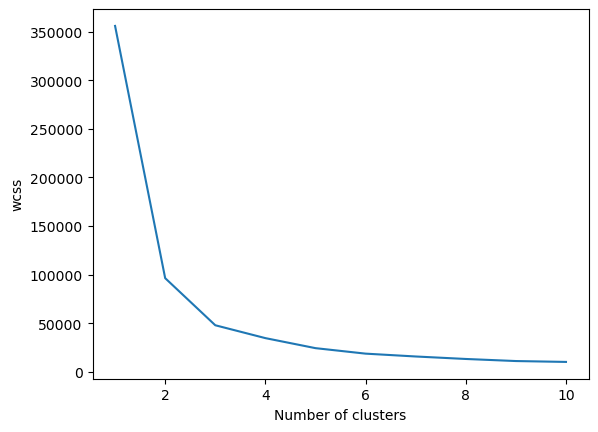

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel("wcss")
plt.show()

In [10]:
km = KMeans(n_clusters=3,n_init =10)

In [11]:
km.fit(x)

KMeans(n_clusters=3)

In [12]:
cluster_label=km.predict(x)

In [13]:
cluster_label

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0])

In [14]:
data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [15]:
pd.Series(cluster_label).value_counts()

1    20
2    16
0    14
dtype: int64

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
silhouette_avg1=silhouette_score(x,cluster_label)
print(silhouette_avg1)

0.5319024108339817


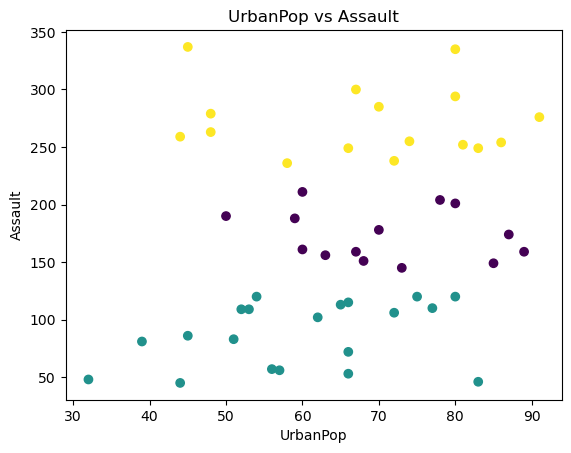

In [18]:
plt.scatter(x['UrbanPop'],x['Assault'],c=cluster_label)
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.title('UrbanPop vs Assault')
plt.show()

In [19]:
data['cluster_label']=cluster_label

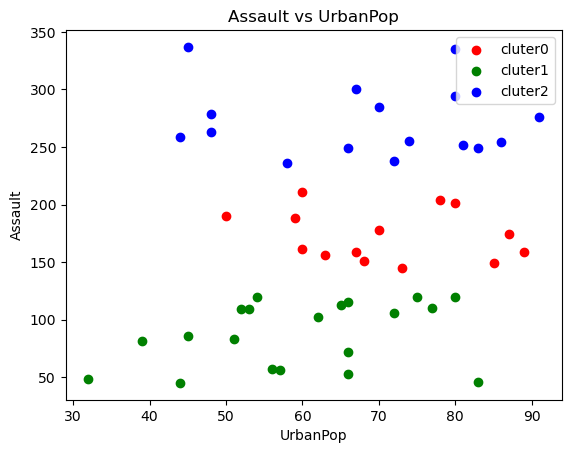

In [20]:
colors = ['r','g','b']
for i in range(max(cluster_label)+1):
    cluster_data = x[cluster_label==i]
    plt.scatter(cluster_data['UrbanPop'],cluster_data['Assault'],c=colors[i],label=f'cluter{i}')
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.title('Assault vs UrbanPop')
plt.legend()

In [21]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [22]:
mergings = linkage(x,method="ward")

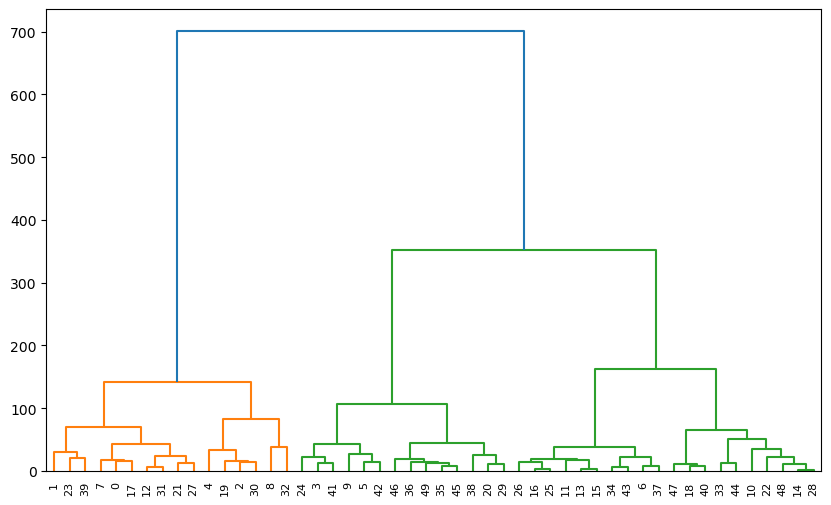

In [23]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

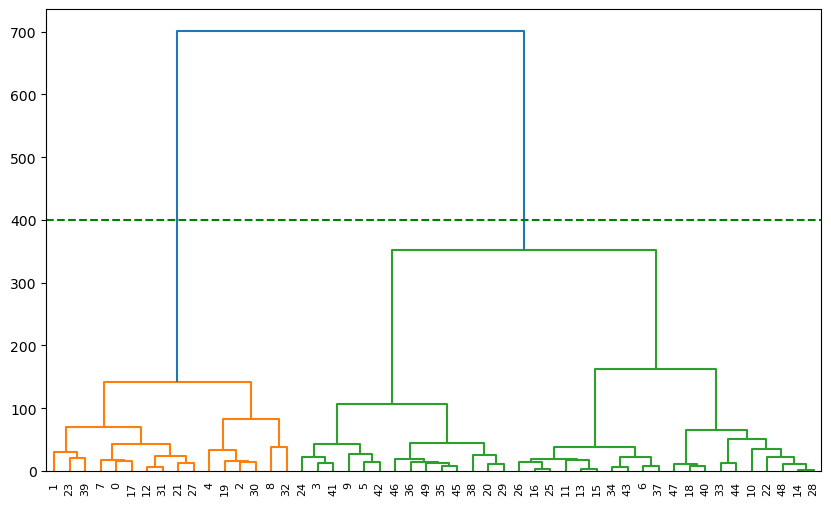

In [24]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(400,color='green',linestyle='--')
plt.show()

In [25]:
cluster_label = fcluster(mergings,400,criterion='distance')

In [26]:
cluster_label

array([1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

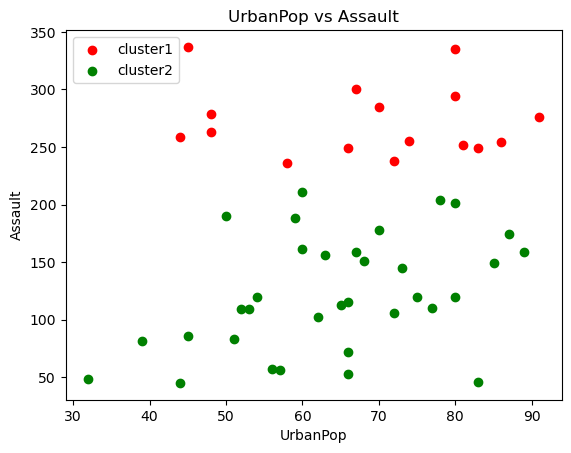

In [27]:
colors = ['r','g']
for cluster_num in range(1,max(cluster_label)+1):
    cluster_data = x[cluster_label == cluster_num]
    plt.scatter(cluster_data['UrbanPop'],cluster_data['Assault'],c=colors[cluster_num-1],label=f'cluster{cluster_num}')
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.title('UrbanPop vs Assault')
plt.legend()

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
silhouette_avg1=silhouette_score(x,cluster_label)
print(silhouette_avg1)

0.576270501827592
